Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


C:\Users\Dinesh\AppData\Local\Temp/ipykernel_29376/3457197851.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


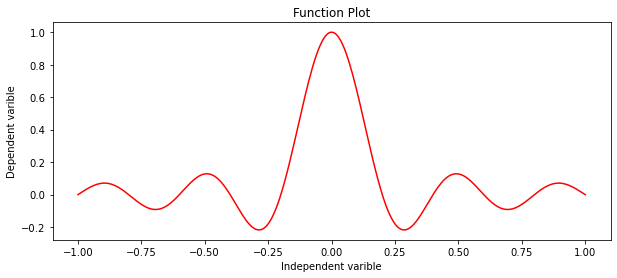

In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

#1st Function
#Creating the data

torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # x data (tensor), shape=(300, 1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x) #non-linear y function
#y = (np.cos(7 * x * np.pi))
print('Xshape:',x.shape,"\n Yshape:",y.shape)

#x, y = Variable(x), Variable(y) #converting data into variables as pytorch requirments
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x.shape

In [26]:
class M1(torch.nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)   # hidden layer
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear (10, 10)
        self.hidden4 = torch.nn.Linear (10, 10)
        self.hidden5 = torch.nn.Linear (10, 10)
        self.hidden6 = torch.nn.Linear (10, 10)
        self.hidden7 = torch.nn.Linear (10,5)
        self.predict = torch.nn.Linear(5, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = F.leaky_relu(self.hidden5(x))
        x = F.leaky_relu(self.hidden6(x))
        x = F.leaky_relu(self.hidden7(x))
        x = self.predict(x)                    # linear output
        return x

m1 = M1()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

#Getting weights & bias
print("\nModel 1 weight and bias before training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])

Total no of parameters in Model 1: 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.8078],
        [-0.3650],
        [-0.2703],
        [-0.2428],
        [-0.7448]])
hidden1.bias 	 tensor([-0.9600, -0.8292, -0.0026, -0.1119,  0.9533])
hidden2.weight 	 tensor([[-0.2596, -0.2189, -0.0557,  0.1425, -0.3685],
        [-0.2856,  0.0327, -0.2392, -0.4267,  0.3678],
        [-0.3008,  0.2883, -0.1259,  0.3128, -0.1154],
        [-0.2130,  0.1155, -0.2494, -0.1968,  0.1566],
        [ 0.0305, -0.0369, -0.3658,  0.3735, -0.1704],
        [ 0.3235,  0.1572, -0.1731, -0.4126, -0.1409],
        [-0.2367,  0.1150, -0.1542, -0.3848,  0.4352],
        [-0.2885,  0.0739, -0.2402,  0.1798, -0.1871],
        [-0.3767,  0.3685,  0.2144,  0.0261, -0.3816],
        [ 0.0160, -0.1938,  0.0833, -0.1408, -0.2259]])
hidden2.bias 	 tensor([ 0.4366,  0.3457, -0.0620, -0.1034, -0.4280, -0.2703, -0.1212,  0.3177,
        -0.0957,  0.4364])
hidden3.weight 	 tensor([[ 0.3076, -0.0174,  0.

In [2]:
# m1 =    torch.nn.Sequential(
#         torch.nn.Linear(1, 5),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(5, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 5),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(5, 1),
#     )

# #optimizer = torch.optim.RAdam(m1.parameters(), lr=0.011)
# optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
# loss_func = torch.nn.MSELoss()  # this is for mean squared error loss

In [27]:
def testFunc(model,x,y):
    max_epoch = 25000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}') #, weight = {model.weight.item()},  bias ={model.bias.item()}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergeance reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [28]:
M1epoch_arr,M1loss_arr,M1prediction = testFunc(m1,x,y)

epoch: 100, loss = 0.0860
epoch: 200, loss = 0.0797
epoch: 300, loss = 0.0389
epoch: 400, loss = 0.0069
epoch: 500, loss = 0.0056
epoch: 600, loss = 0.0044
epoch: 700, loss = 0.0041
epoch: 800, loss = 0.0039
epoch: 900, loss = 0.0033
epoch: 1000, loss = 0.0031
epoch: 1100, loss = 0.0031
epoch: 1200, loss = 0.0031
epoch: 1300, loss = 0.0031
epoch: 1400, loss = 0.0030
epoch: 1500, loss = 0.0030
epoch: 1600, loss = 0.0030
epoch: 1700, loss = 0.0030
epoch: 1800, loss = 0.0030
epoch: 1900, loss = 0.0030
epoch: 2000, loss = 0.0030
epoch: 2100, loss = 0.0026
epoch: 2200, loss = 0.0016
epoch: 2300, loss = 0.0014
epoch: 2400, loss = 0.0014
epoch: 2500, loss = 0.0014
epoch: 2600, loss = 0.0014
epoch: 2700, loss = 0.0014
epoch: 2800, loss = 0.0014
epoch: 2900, loss = 0.0014
epoch: 3000, loss = 0.0014
epoch: 3100, loss = 0.0013
epoch: 3200, loss = 0.0013
epoch: 3300, loss = 0.0013
epoch: 3400, loss = 0.0013
epoch: 3500, loss = 0.0013
epoch: 3600, loss = 0.0013
epoch: 3700, loss = 0.0013
epoch: 380

In [30]:
#Getting weights & bias
print("\nModel 1 weight and bias after training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])


Model 1 weight and bias after training

hidden1.weight 	 tensor([[ 0.1793],
        [-0.4495],
        [-0.7864],
        [-0.6510],
        [-1.0323]])
hidden1.bias 	 tensor([-0.0096, -0.3972,  0.1557, -0.4457,  0.4443])
hidden2.weight 	 tensor([[ 3.0855e-02,  4.5201e-03, -4.6786e-01, -4.5067e-03, -1.9269e-01],
        [-5.3327e-01,  1.2178e-01,  1.9152e-01, -5.6430e-02,  2.6445e-01],
        [ 8.4500e-03, -3.9921e-01,  2.6215e-01,  4.4554e-01,  3.4812e-01],
        [ 4.0973e-03,  3.4914e-01,  1.8494e-01, -3.9504e-01,  3.0757e-01],
        [ 7.8150e-15,  1.4920e-14, -2.0561e-13,  6.4336e-14, -7.4590e-13],
        [ 1.6922e-11,  6.1171e-11, -8.2796e-10, -3.5407e-10, -1.2236e-09],
        [-1.7307e-02,  1.5238e-01,  4.0835e-01, -1.5936e-01,  7.7648e-01],
        [-5.4156e-03,  7.3318e-03, -1.9851e-01,  9.6384e-03, -8.4075e-02],
        [ 7.6609e-03, -1.6817e-02, -8.0757e-02, -1.2283e-02, -5.4261e-01],
        [ 9.0259e-03, -1.1949e-02, -1.7987e-01, -1.1891e-02, -4.8930e-01]])
hidden2.b

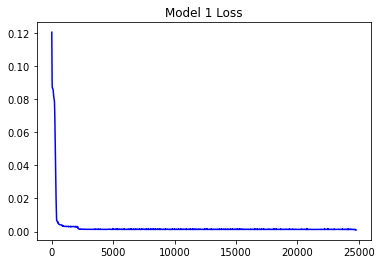

In [29]:
#plot
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()

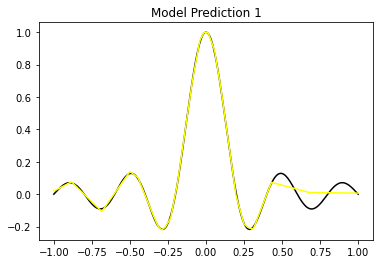

In [31]:
#plot

plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 1')
plt.show()

In [43]:
# m2 =    torch.nn.Sequential(
#         torch.nn.Linear(1, 10),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(10, 18),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(18, 15),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(15, 4),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(4, 1),
#     )

# #optimizer = torch.optim.RAdam(m2.parameters(), lr=0.011)
# optimizer = torch.optim.Adam(m2.parameters(), lr=0.012, weight_decay = 1e-4)
# loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [32]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   # hidden layer
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                    # linear output
        return x

m2 = M2()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m2.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 2:', np.sum(a))


#Getting weights & bias
print("\nModel 2 weight and bias before training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])

Total no of parameters in Model 2: 572

Model 2 weight and bias before training

hidden1.weight 	 tensor([[ 0.0947],
        [ 0.7489],
        [-0.4258],
        [-0.8512],
        [ 0.6152],
        [ 0.3598],
        [-0.1353],
        [ 0.4303],
        [ 0.7223],
        [ 0.0667]])
hidden1.bias 	 tensor([ 0.6967,  0.3263, -0.4887, -0.0507,  0.6678, -0.8770,  0.1823,  0.8648,
        -0.7588,  0.9753])
hidden2.weight 	 tensor([[ 0.2888, -0.2134,  0.1175,  0.1204,  0.1546,  0.1645, -0.1506, -0.0981,
          0.0967, -0.2437],
        [-0.0227, -0.2655, -0.3077, -0.1260, -0.3115, -0.0857,  0.1831,  0.0296,
         -0.0193,  0.1378],
        [ 0.1553, -0.3088,  0.2450,  0.2284,  0.0611, -0.1774, -0.1051, -0.1123,
         -0.1323,  0.1848],
        [-0.3106, -0.0212,  0.2672,  0.1923, -0.2401,  0.1470, -0.2772, -0.2740,
          0.3148, -0.0402],
        [-0.3075, -0.2607,  0.0024,  0.0077,  0.2153, -0.0969,  0.1496,  0.0907,
          0.1681, -0.3108],
        [-0.1574, -0.2499, 

In [33]:
M2epoch_arr,M2loss_arr,M2prediction = testFunc(m2,x,y)

epoch: 100, loss = 0.0755
epoch: 200, loss = 0.0146
epoch: 300, loss = 0.0080
epoch: 400, loss = 0.0078
epoch: 500, loss = 0.0076
epoch: 600, loss = 0.0074
epoch: 700, loss = 0.0071
epoch: 800, loss = 0.0067
epoch: 900, loss = 0.0063
epoch: 1000, loss = 0.0059
epoch: 1100, loss = 0.0057
epoch: 1200, loss = 0.0055
epoch: 1300, loss = 0.0054
epoch: 1400, loss = 0.0052
epoch: 1500, loss = 0.0051
epoch: 1600, loss = 0.0051
epoch: 1700, loss = 0.0050
epoch: 1800, loss = 0.0049
epoch: 1900, loss = 0.0049
epoch: 2000, loss = 0.0047
epoch: 2100, loss = 0.0046
epoch: 2200, loss = 0.0045
epoch: 2300, loss = 0.0044
epoch: 2400, loss = 0.0043
epoch: 2500, loss = 0.0042
epoch: 2600, loss = 0.0041
epoch: 2700, loss = 0.0040
epoch: 2800, loss = 0.0039
epoch: 2900, loss = 0.0039
epoch: 3000, loss = 0.0037
epoch: 3100, loss = 0.0036
epoch: 3200, loss = 0.0035
epoch: 3300, loss = 0.0033
epoch: 3400, loss = 0.0032
epoch: 3500, loss = 0.0030
epoch: 3600, loss = 0.0029
epoch: 3700, loss = 0.0028
epoch: 380

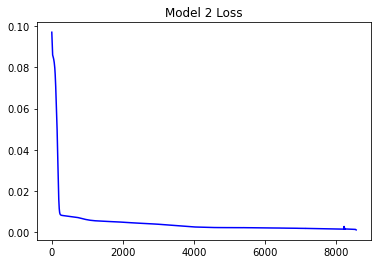

In [34]:
#plot
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()

In [35]:
#Getting weights & bias
print("\nModel 2 weight and bias after training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])


Model 2 weight and bias after training

hidden1.weight 	 tensor([[-4.0081e-01],
        [ 1.6763e+00],
        [-1.2875e+00],
        [-7.8469e-03],
        [ 1.6126e+00],
        [-1.8937e-35],
        [-1.5086e+00],
        [ 1.4931e+00],
        [ 1.9430e-39],
        [-4.6654e-01]])
hidden1.bias 	 tensor([ 6.7322e-01,  7.8413e-01,  8.7468e-01, -5.3083e-04,  7.5362e-01,
        -1.7585e-34,  7.0290e-01,  1.0273e+00, -1.9889e-39,  8.1108e-01])
hidden2.weight 	 tensor([[ 2.5072e-02,  1.0282e-01, -6.8055e-01,  2.8941e-04,  9.8682e-02,
         -1.7218e-35,  3.7544e-01,  9.4784e-02, -1.0561e-38,  1.6210e-02],
        [ 5.1708e-01, -3.9180e-01,  7.6684e-01,  7.7749e-04, -3.7538e-01,
         -1.0032e-34,  8.8960e-01, -6.7341e-04, -1.0069e-38,  6.1329e-01],
        [ 6.1613e-02, -2.5725e-01,  9.6148e-02,  3.2994e-04, -2.4721e-01,
          2.0190e-35,  1.3066e-01,  2.7893e-01,  5.9495e-39,  7.2064e-02],
        [ 3.7166e-01, -2.2238e-01,  5.3003e-01,  7.5844e-04, -2.1291e-01,
          3

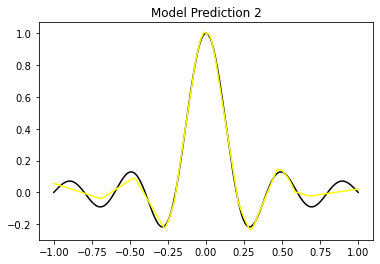

In [36]:
#plot
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M2prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()

In [48]:
# m3 =    torch.nn.Sequential(
#         torch.nn.Linear(1, 190),
#         torch.nn.LeakyReLU(),
#         torch.nn.Linear(190, 1),
#     )

# #optimizer = torch.optim.RAdam(m2.parameters(), lr=0.011)
# optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
# loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [37]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   # hidden layer
        self.predict = torch.nn.Linear(190, 1)   # output layer
        #self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      # activation function for hidden layer
        x = self.predict(x)                    # linear output
        return x

m3 = M3()     # define the network
#optimizer = torch.optim.RMSprop(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

a=[]
for i in m3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))


#Getting weights & bias
print("\nModel 3 weight and bias before training\n")
for param in m3.state_dict():
    print(param, "\t",m3.state_dict()[param])

Total no of parameters in Model 3: 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[ 0.2257],
        [ 0.0841],
        [ 0.4098],
        [-0.5348],
        [-0.1761],
        [-0.4991],
        [ 0.7978],
        [ 0.8745],
        [-0.3252],
        [ 0.2298],
        [ 0.4953],
        [ 0.9528],
        [ 0.7996],
        [-0.3427],
        [-0.8822],
        [ 0.9186],
        [ 0.6202],
        [-0.7898],
        [ 0.1797],
        [ 0.6774],
        [-0.6749],
        [-0.7550],
        [-0.2344],
        [ 0.3172],
        [ 0.0114],
        [ 0.5250],
        [-0.9739],
        [-0.3427],
        [-0.2034],
        [ 0.6146],
        [-0.8123],
        [-0.7499],
        [ 0.6446],
        [-0.9743],
        [-0.2698],
        [ 0.6302],
        [ 0.1669],
        [ 0.0607],
        [-0.2675],
        [ 0.9215],
        [ 0.1525],
        [-0.1679],
        [ 0.6508],
        [ 0.2151],
        [ 0.2545],
        [ 0.3915],
        [ 0.4527],
        [

In [38]:
M3epoch_arr,M3loss_arr,M3prediction = testFunc(m3,x,y)

epoch: 100, loss = 0.0697
epoch: 200, loss = 0.0589
epoch: 300, loss = 0.0492
epoch: 400, loss = 0.0403
epoch: 500, loss = 0.0316
epoch: 600, loss = 0.0243
epoch: 700, loss = 0.0183
epoch: 800, loss = 0.0139
epoch: 900, loss = 0.0107
epoch: 1000, loss = 0.0085
epoch: 1100, loss = 0.0070
epoch: 1200, loss = 0.0058
epoch: 1300, loss = 0.0049
epoch: 1400, loss = 0.0042
epoch: 1500, loss = 0.0036
epoch: 1600, loss = 0.0032
epoch: 1700, loss = 0.0028
epoch: 1800, loss = 0.0025
epoch: 1900, loss = 0.0022
epoch: 2000, loss = 0.0020
epoch: 2100, loss = 0.0019
epoch: 2200, loss = 0.0017
epoch: 2300, loss = 0.0016
epoch: 2400, loss = 0.0015
epoch: 2500, loss = 0.0014
epoch: 2600, loss = 0.0013
epoch: 2700, loss = 0.0013
epoch: 2800, loss = 0.0012
epoch: 2900, loss = 0.0011
epoch: 3000, loss = 0.0011
Convergeance reached for loss: 0.0009998622


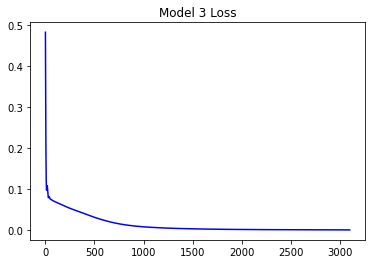

In [39]:
#plot
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()

In [40]:
#Getting weights & bias
print("\nModel 3 weight and bias before training\n")
for param in m3.state_dict():
    print(param, "\t",m3.state_dict()[param])


Model 3 weight and bias before training

hidden1.weight 	 tensor([[ 6.7230e-02],
        [-1.1917e-03],
        [ 4.1749e-02],
        [-7.9035e-01],
        [-4.0158e-02],
        [-8.1744e-01],
        [ 1.1806e+00],
        [ 8.2168e-01],
        [-1.0400e-01],
        [ 9.7171e-03],
        [ 1.4496e-02],
        [ 1.8607e-01],
        [ 1.0351e+00],
        [-4.9862e-05],
        [-7.2284e-01],
        [ 2.5753e-01],
        [ 2.1596e-06],
        [-1.3630e-02],
        [ 5.8358e-05],
        [ 6.6989e-05],
        [-7.5203e-01],
        [-2.0579e+00],
        [-2.1897e-02],
        [ 9.1143e-03],
        [ 2.3251e-05],
        [ 7.6994e-01],
        [-4.9409e-01],
        [-1.3491e-01],
        [-7.1731e-01],
        [ 1.5753e-05],
        [-6.1191e-01],
        [-2.4769e-01],
        [ 3.2688e-01],
        [-9.5509e-01],
        [-3.1618e-01],
        [ 3.5270e-01],
        [ 2.2999e-02],
        [ 4.5462e-05],
        [-3.8164e-01],
        [ 7.6794e-01],
        [-2.5407e-03]

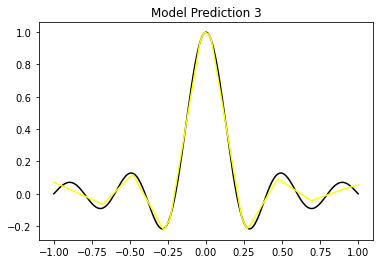

In [41]:
#plot
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M3prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 3')
plt.show()

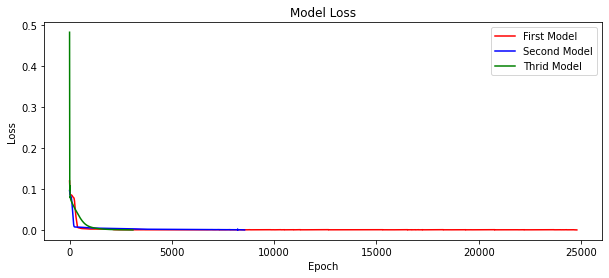

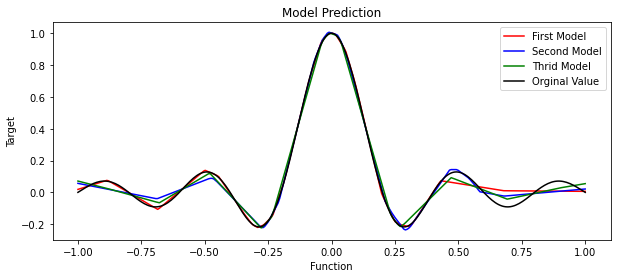

In [42]:
plt.figure(figsize=(10,4))
plt.plot(M1epoch_arr,M1loss_arr, color = "red")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "green")
plt.title('Model Loss')
plt.legend(['First Model', 'Second Model','Thrid Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x,M1prediction.data.numpy(),color="red")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="black")
plt.title('Model Prediction')
plt.legend(['First Model', 'Second Model','Thrid Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction.png')
plt.show()

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


C:\Users\Dinesh\AppData\Local\Temp/ipykernel_29376/3631774031.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


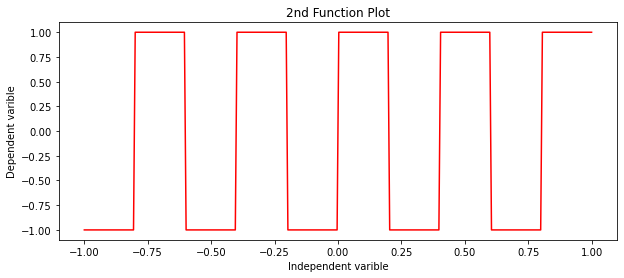

In [43]:
#2nd Function
#Creating the data

torch.manual_seed(1) 
x2 = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # x data (tensor), shape=(300, 1)
y2 = np.sign(np.sin(5*np.pi*x)) #non-linear y function
#y = (np.cos(7 * x * np.pi))

print('Xshape:',x.shape,"\n Yshape:",y.shape)

#x, y = Variable(x), Variable(y) #converting data into variables as pytorch requirments
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x2, y2, color = "red")
plt.title('2nd Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('funcplt.png')

plt.show()

n_samples, n_features = x2.shape

In [44]:
f2m1 = M1()     # re-initialize the network
optimizer = torch.optim.RMSprop(f2m1.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

F2M1epoch_arr,F2M1loss_arr,F2M1prediction = testFunc(f2m1,x2,y2)

epoch: 100, loss = 0.9652
epoch: 200, loss = 0.9478
epoch: 300, loss = 0.9240
epoch: 400, loss = 0.8657
epoch: 500, loss = 0.8147
epoch: 600, loss = 0.7817
epoch: 700, loss = 0.7361
epoch: 800, loss = 0.6926
epoch: 900, loss = 0.6679
epoch: 1000, loss = 0.6340
epoch: 1100, loss = 0.5672
epoch: 1200, loss = 0.4940
epoch: 1300, loss = 0.3816
epoch: 1400, loss = 0.2764
epoch: 1500, loss = 0.2402
epoch: 1600, loss = 0.2695
epoch: 1700, loss = 0.2194
epoch: 1800, loss = 0.1659
epoch: 1900, loss = 0.1882
epoch: 2000, loss = 0.1688
epoch: 2100, loss = 0.1513
epoch: 2200, loss = 0.1371
epoch: 2300, loss = 0.1312
epoch: 2400, loss = 0.1357
epoch: 2500, loss = 0.1621
epoch: 2600, loss = 0.1631
epoch: 2700, loss = 0.1179
epoch: 2800, loss = 0.2097
epoch: 2900, loss = 0.1695
epoch: 3000, loss = 0.1627
epoch: 3100, loss = 0.1369
epoch: 3200, loss = 0.1351
epoch: 3300, loss = 0.1133
epoch: 3400, loss = 0.1053
epoch: 3500, loss = 0.1280
epoch: 3600, loss = 0.1689
epoch: 3700, loss = 0.1296
epoch: 380

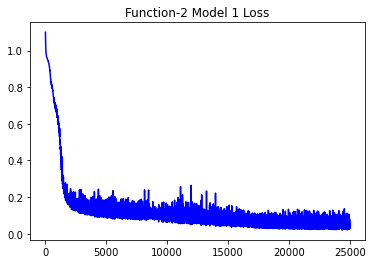

In [45]:
#plot
plt.plot(F2M1epoch_arr,F2M1loss_arr,color="blue")
plt.title('Function-2 Model 1 Loss')
plt.show()

In [46]:
#Getting weights & bias
print("\nModel 1 weight and bias after training for F2\n")
for param in f2m1.state_dict():
    print(param, "\t",f2m1.state_dict()[param])


Model 1 weight and bias after training for F2

hidden1.weight 	 tensor([[ 0.5203],
        [-1.1218],
        [-0.5765],
        [ 0.6494],
        [-1.7147]])
hidden1.bias 	 tensor([ 0.5498, -0.4868,  0.4717,  0.2640,  0.0786])
hidden2.weight 	 tensor([[-0.3122, -0.7757,  0.0327, -2.3379,  0.2913],
        [-0.0920,  0.3763,  0.3354,  0.0766, -0.9354],
        [-0.1320,  1.1222,  0.1692, -0.2334, -0.7655],
        [ 0.0045,  1.0808,  0.3522, -0.4725, -0.6076],
        [ 0.0046,  0.0571,  0.3649, -0.3040, -1.4414],
        [-0.6401,  1.3685, -0.0120, -0.1812,  0.3792],
        [ 0.2479,  0.4924,  0.5713, -0.2663, -1.0574],
        [ 0.0860,  0.4303,  0.4884, -0.2865, -1.0050],
        [-1.1418,  0.7050, -0.1740, -0.0404,  0.6675],
        [ 0.4315, -0.2810, -0.7541,  0.4785, -0.5732]])
hidden2.bias 	 tensor([-0.1234,  0.2443,  0.3231,  0.3788,  0.1076, -0.2900,  0.0453,  0.1518,
        -0.9006, -0.1932])
hidden3.weight 	 tensor([[-0.7068,  0.2732,  0.3385,  0.1176,  0.3148,  1.6574, 

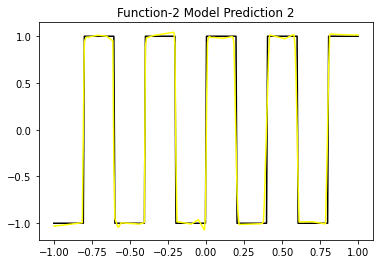

In [47]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M1prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 2')
plt.show()

In [48]:
f2m2 = M2()     # re-initialize the network
optimizer = torch.optim.Adam(f2m2.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

F2M2epoch_arr,F2M2loss_arr,F2M2prediction = testFunc(f2m2,x2,y2)

epoch: 100, loss = 0.8509
epoch: 200, loss = 0.6403
epoch: 300, loss = 0.4068
epoch: 400, loss = 0.3568
epoch: 500, loss = 0.3332
epoch: 600, loss = 0.3188
epoch: 700, loss = 0.3051
epoch: 800, loss = 0.3045
epoch: 900, loss = 0.2960
epoch: 1000, loss = 0.2924
epoch: 1100, loss = 0.2920
epoch: 1200, loss = 0.2898
epoch: 1300, loss = 0.2872
epoch: 1400, loss = 0.2868
epoch: 1500, loss = 0.2931
epoch: 1600, loss = 0.2844
epoch: 1700, loss = 0.2837
epoch: 1800, loss = 0.2852
epoch: 1900, loss = 0.2839
epoch: 2000, loss = 0.2825
epoch: 2100, loss = 0.3657
epoch: 2200, loss = 0.2808
epoch: 2300, loss = 0.2797
epoch: 2400, loss = 0.2812
epoch: 2500, loss = 0.2789
epoch: 2600, loss = 1.2990
epoch: 2700, loss = 0.6021
epoch: 2800, loss = 0.4386
epoch: 2900, loss = 0.3861
epoch: 3000, loss = 0.3256
epoch: 3100, loss = 0.1841
epoch: 3200, loss = 0.1167
epoch: 3300, loss = 0.1130
epoch: 3400, loss = 0.1100
epoch: 3500, loss = 0.1107
epoch: 3600, loss = 0.1079
epoch: 3700, loss = 0.1055
epoch: 380

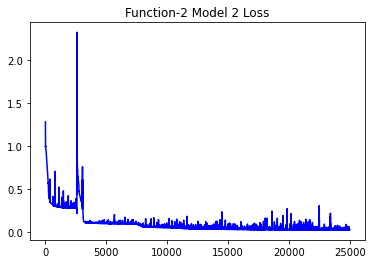

In [49]:
#plot
plt.plot(F2M2epoch_arr,F2M2loss_arr,color="blue")
plt.title('Function-2 Model 2 Loss')
plt.show()

In [50]:
#Getting weights & bias
print("\nModel 2 weight and bias after training for F2\n")
for param in f2m2.state_dict():
    print(param, "\t",f2m2.state_dict()[param])


Model 2 weight and bias after training for F2

hidden1.weight 	 tensor([[-1.5529e+00],
        [-2.1265e+00],
        [-1.1967e+00],
        [-4.0141e-01],
        [-2.7489e+00],
        [ 1.4188e-04],
        [-7.8284e-01],
        [ 1.1736e+00],
        [-6.6486e-01],
        [ 1.7417e+00]])
hidden1.bias 	 tensor([ 6.5941e-01, -1.7760e-02,  9.6475e-01,  3.2388e-01, -5.4208e-01,
        -3.6713e-04,  6.3233e-01,  9.5335e-01,  5.3756e-01, -9.7394e-01])
hidden2.weight 	 tensor([[-3.4363e-01,  4.2334e-01, -4.5875e-02, -3.0170e-02,  8.6733e-01,
          7.1056e-05, -1.4417e-01,  8.8128e-02,  1.1658e-01, -3.2709e-01],
        [-4.1385e-01,  3.9513e-01,  3.9814e-01,  2.5223e-02, -2.3254e-01,
          6.7545e-05,  4.2751e-01,  2.0904e-01,  3.1331e-01, -1.2768e+00],
        [-1.7616e-03, -2.0740e-03, -1.1945e-03, -5.9699e-04, -2.0355e-03,
         -2.8845e-07, -7.9183e-04, -1.8589e-04, -7.0551e-04,  8.4812e-05],
        [ 6.6035e-02, -4.6761e-01,  5.2604e-01,  4.1248e-01, -8.9819e-01,
    

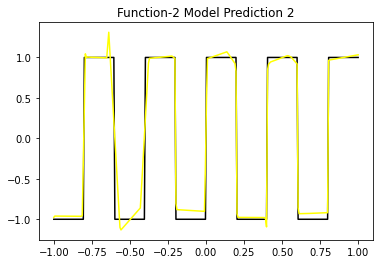

In [51]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M2prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 2')
plt.show()

In [52]:
f2m3 = M3()     # re-initialize the network
optimizer = torch.optim.RMSprop(f2m3.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
F2M3epoch_arr,F2M3loss_arr,F2M3prediction = testFunc(f2m3,x2,y2)

epoch: 100, loss = 0.8762
epoch: 200, loss = 0.8431
epoch: 300, loss = 0.8216
epoch: 400, loss = 0.8041
epoch: 500, loss = 0.7900
epoch: 600, loss = 0.7782
epoch: 700, loss = 0.7679
epoch: 800, loss = 0.7583
epoch: 900, loss = 0.7493
epoch: 1000, loss = 0.7402
epoch: 1100, loss = 0.7313
epoch: 1200, loss = 0.7222
epoch: 1300, loss = 0.7131
epoch: 1400, loss = 0.7043
epoch: 1500, loss = 0.6950
epoch: 1600, loss = 0.6860
epoch: 1700, loss = 0.6767
epoch: 1800, loss = 0.6678
epoch: 1900, loss = 0.6588
epoch: 2000, loss = 0.6498
epoch: 2100, loss = 0.6409
epoch: 2200, loss = 0.6317
epoch: 2300, loss = 0.6233
epoch: 2400, loss = 0.6145
epoch: 2500, loss = 0.6059
epoch: 2600, loss = 0.5975
epoch: 2700, loss = 0.5892
epoch: 2800, loss = 0.5807
epoch: 2900, loss = 0.5728
epoch: 3000, loss = 0.5647
epoch: 3100, loss = 0.5567
epoch: 3200, loss = 0.5490
epoch: 3300, loss = 0.5414
epoch: 3400, loss = 0.5344
epoch: 3500, loss = 0.5268
epoch: 3600, loss = 0.5192
epoch: 3700, loss = 0.5131
epoch: 380

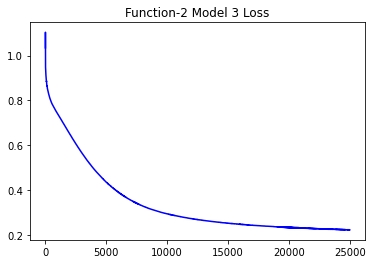

In [53]:
#plot
plt.plot(F2M3epoch_arr,F2M3loss_arr,color="blue")
plt.title('Function-2 Model 3 Loss')
plt.show()

In [54]:
#Getting weights & bias
print("\nModel 3 weight and bias after training for F2\n")
for param in f2m3.state_dict():
    print(param, "\t",f2m3.state_dict()[param])


Model 3 weight and bias after training for F2

hidden1.weight 	 tensor([[ 1.2083e-03],
        [-8.9372e-01],
        [-1.5395e-06],
        [-2.6215e-01],
        [-2.9102e+00],
        [-3.1383e-05],
        [-2.1908e+00],
        [-1.3444e+00],
        [ 1.4414e-05],
        [ 1.2799e+00],
        [-1.5684e+00],
        [-1.2770e+00],
        [-4.2449e-04],
        [ 1.3639e+00],
        [-1.3867e+00],
        [-1.4875e+00],
        [-3.4734e-01],
        [-7.3277e-01],
        [ 1.0751e+00],
        [ 1.2237e+00],
        [-1.5670e+00],
        [ 1.0173e-01],
        [ 1.7364e+00],
        [-8.2403e-01],
        [ 1.2304e-01],
        [-1.7718e+00],
        [-1.7759e+00],
        [ 2.1409e-04],
        [-1.3833e-06],
        [ 1.0410e+00],
        [-2.3391e-03],
        [ 9.3626e-02],
        [-1.5761e+00],
        [ 1.0886e-03],
        [ 2.7444e+00],
        [-6.2143e-11],
        [-1.6096e+00],
        [-1.3895e+00],
        [ 1.9590e+00],
        [ 2.1918e-04],
        [ 1.624

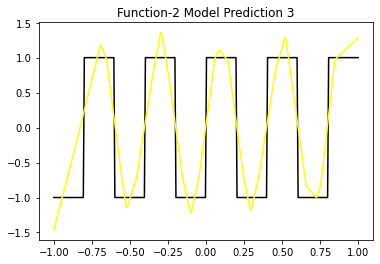

In [55]:
#plot
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M3prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 3')
plt.show()

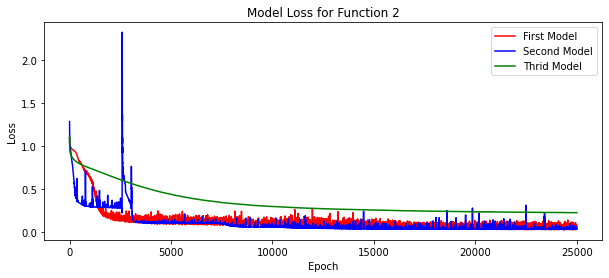

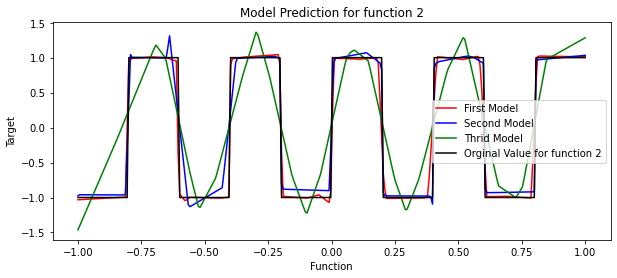

In [56]:
plt.figure(figsize=(10,4))
plt.plot(F2M1epoch_arr,F2M1loss_arr, color = "red")
plt.plot(F2M2epoch_arr,F2M2loss_arr, color = "blue")
plt.plot(F2M3epoch_arr,F2M3loss_arr, color = "green")
plt.title('Model Loss for Function 2')
plt.legend(['First Model', 'Second Model','Thrid Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x2,F2M1prediction.data.numpy(),color="red")
plt.plot(x2,F2M2prediction.data.numpy(),color="blue")
plt.plot(x2,F2M3prediction.data.numpy(),color="green")
plt.plot(x2,y2.numpy(),color="black")
plt.title('Model Prediction for function 2')
plt.legend(['First Model', 'Second Model','Thrid Model','Orginal Value for function 2'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction.png')
plt.show()